In [64]:
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [65]:
client= pd.read_csv('client.csv', delimiter=',')

In [66]:
client

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5
...,...,...,...
5364,13955,456030,1
5365,13956,430406,1
5366,13968,680413,61
5367,13971,626019,67


In [67]:
# normalizaçao da tabela cliente 
client['birth_number'] =client.birth_number.astype(str)
client['birth_year'] =('19' + client['birth_number'].str[0:2])
client['Age'] = (1999 - client['birth_year'].astype(int)) #datetime.now().year
client['birth_month'] = (client['birth_number'].str[2:4])
client['birth_day'] = (client['birth_number'].str[4:6])


In [68]:
client

,client_id,birth_number,district_id,birth_year,Age,birth_month,birth_day
0,1,706213,18,1970,29,62,13
1,2,450204,1,1945,54,02,04
2,3,406009,1,1940,59,60,09
3,4,561201,5,1956,43,12,01
4,5,605703,5,1960,39,57,03
...,...,...,...,...,...,...,...
5364,13955,456030,1,1945,54,60,30
5365,13956,430406,1,1943,56,04,06
5366,13968,680413,61,1968,31,04,13
5367,13971,626019,67,1962,37,60,19


In [69]:
def month_gender (birth_month):
    teste = str(birth_month)
    birth = int(teste[:2])
   # for c in teste:
    if birth > 50:
        gender = 'F'
        birth = birth - 50
           # print(c)
    else:
        gender = 'M'
    return pd.Series({'birth_month': birth,'gender': gender})

In [70]:
client[['birth_month','gender']] = client['birth_month'].apply(month_gender)
client['birth_month'] = client.birth_month.astype(str)
client['birth_number']= client['birth_year'] + client['birth_month']+ client['birth_day']
client['birth_number'] = pd.to_datetime(client.birth_number.astype(int).astype(str), format='%Y%m%d')
client['gender'] = pd.Series(client.gender.astype('category'))
client.drop(['birth_year','birth_month','birth_day'],axis=1,inplace =True)

In [71]:
client

,client_id,birth_number,district_id,Age,gender
0,1,1970-12-13,18,29,F
1,2,1945-02-04,1,54,M
2,3,1940-10-09,1,59,F
3,4,1956-12-01,5,43,M
4,5,1960-07-03,5,39,F
...,...,...,...,...,...
5364,13955,1945-10-30,1,54,F
5365,13956,1943-04-06,1,56,M
5366,13968,1968-04-13,61,31,M
5367,13971,1962-10-19,67,37,F


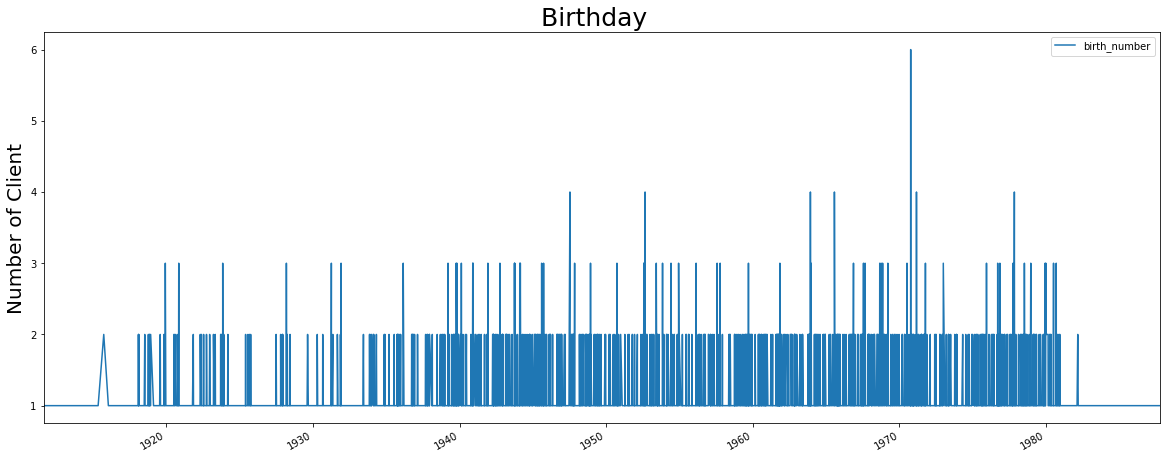

In [72]:
plt.rcParams['figure.figsize']=(20,8)
plt.title('Birthday  ',fontsize='25')
plt.rcParams['figure.figsize']=(20,8)
plt.ylabel('Number of Client',horizontalalignment='center',fontsize='20')
plt.xlabel('',horizontalalignment='center',fontsize='20')

client['birth_number'].value_counts().plot(legend='best')
plt.show()

In [73]:
client['Age'].loc[client['Age'] < 65 ]

0       29
1       54
2       59
3       43
4       39
        ..
5364    54
5365    56
5366    31
5367    37
5368    46
Name: Age, Length: 4494, dtype: int32

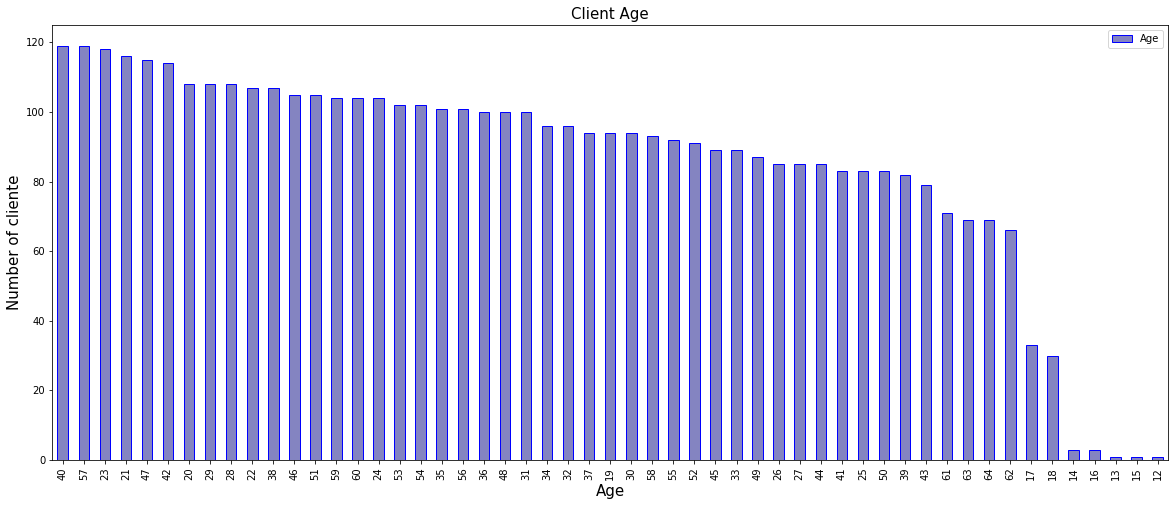

In [74]:
plt.rcParams['figure.figsize']=(20,8)
plt.title('Client Age', fontsize='15')
plt.ylabel('Number of cliente',fontsize='15')
plt.xlabel('Age',fontsize='15')
(client['Age'].loc[client['Age'] < 65 ]).value_counts().plot(kind='bar',color =(0.2,0.2,0.6,0.6), edgecolor ='blue',legend='best')

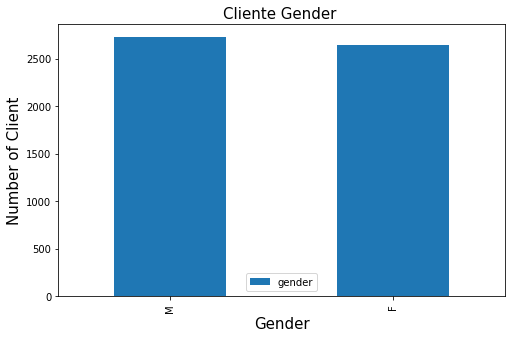

In [75]:
len_client= np.arange(len(client['client_id']))
plt.rcParams['figure.figsize']=(8,5)
plt.title('Cliente Gender ',fontsize='15')
plt.ylabel('Number of Client',fontsize='15')
plt.xlabel('Gender',fontsize='15')
#teste = 
client['gender'].value_counts().plot(kind='bar',legend='best')

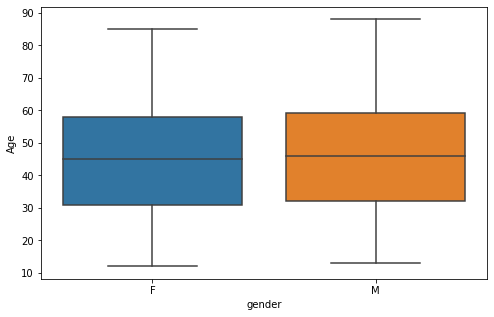

In [76]:
sns.boxplot(x=client["gender"],y=client["Age"])